# Introduction to Quantitative Finance

# 量化金融导论

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

版权 (c) 2019 Python Charmers Pty Ltd, 澳大利亚, <https://pythoncharmers.com>。保留所有权利。

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

根据知识共享署名-非商业性使用 4.0 国际许可协议 (CC BY-NC 4.0) 发布。详情请参阅 `LICENSE.md`。

Sponsored by Tibra Global Services, <https://tibra.com>

由 Tibra Global Services 赞助，<https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.2: Covariance and Correlation

## 模块 1.2: 协方差与相关性

### 1.2.3 Lagged Correlation /  Cross correlation


The correlation of two variables is an incredibly useful metric, however it has a severe limitation, particularly in many time series values.

两个变量的相关性是一个非常有用的指标，然而它有一个严重的局限性，特别是在许多时间序列值中。

We would investigate the correlation if we expect a causation (note that we cannot prove causation) between $X$ and $Y$, that is, we expect that if we change $X$ then we cause a change in $Y$. An example of such a hypothesis would be "if we spend more money on advertising, our sales will increase". We can affect advertising spend, which we assume in turn will cause an increase in sales.

如果我们在 $X$ 和 $Y$ 之间预期存在因果关系（注意我们无法证明因果关系），我们会研究相关性，也就是说，我们预期如果改变 $X$，就会引起 $Y$ 的变化。一个这样的假设例子是“如果我们增加广告支出，我们的销售额将会增加”。我们可以影响广告支出，进而假设这会导致销售额的增加。

However, the problem with determining this correlation is that advertising spend does not *immediately* affect sales. Instead, there is a period of time, a **lag**, between the spending and the sales increase. At the very least, people need time to get to the store!

然而，确定这种相关性的问题在于，广告支出并不会*立即*影响销售额。相反，在支出和销售额增长之间存在一段时间，即**滞后**。至少，人们需要时间去商店！

Computing this **lagged correlation** is a normal task, and a common one when analysing time series data. Another phrase for this term is **cross-correlation**, with a lag $k$.

计算这种**滞后相关性**是一项常见的任务，尤其是在分析时间序列数据时。这个术语的另一个说法是**互相关**，带有滞后 $k$。

On terminology, if $X$ "happens first", we say it *leads* $Y$. If $Y$ "happens first", then $X$ *lags* $Y$. In many programming functions, the term used is simply "lag", and a negative lag value means a lead. Be careful with this though - some programs will only consider "lead", and positive values indicate this. Always check the documentation!

在术语上，如果 $X$ “先发生”，我们说它 *领先* $Y$。如果 $Y$ “先发生”，那么 $X$ *滞后* $Y$。在许多编程函数中，使用的术语是“滞后”，负的滞后值表示领先。不过要注意这一点——有些程序只考虑“领先”，正值表示这一点。务必查看文档！


In [1]:
%run setup.ipy

### Investigating Cross Correlation

### 研究互相关

Let's have a look at an example. One might suspect that interest rate is a leading indicator of inflation. If interest rates are lower, then they spend more, leading to the inflation. 

让我们来看一个例子。有人可能会怀疑利率是通货膨胀的领先指标。如果利率较低，那么人们会花更多的钱，从而导致通货膨胀。

<div class="alert alert-danger">
    In this section we will manually compute the lag and then the correlation. In practice, do not do this and see the next section for methods that do this for you. "Stand on the shoulders of giants", and tend to use existing libraries rather than rewriting core components of your program from scratch.

在本节中，我们将手动计算滞后和相关性。实际上，不要这样做，请参阅下一节中为您提供的方法。“站在巨人的肩膀上”，倾向于使用现有的库，而不是从头开始重写程序的核心组件。
</div>

Let's look at some data:

让我们来看一些数据：


In [4]:
# 导入 yfinance 数据访问库
import yfinance as yf

# 获取澳大利亚利率数据 (使用澳大利亚10年期国债收益率作为替代)
interest_rates = yf.download("^AORD", start="1990-01-01")['Close']
interest_rates = interest_rates.resample('Q').last() # 转换为季度数据
interest_rates.name = "Cash Rate"

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_13842/3850291149.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  interest_rates = interest_rates.resample('Q').last() # 转换为季度数据


In [5]:
# 将利率数据的列名设置为"Cash Rate"（现金利率）
interest_rates.columns = ["Cash Rate"]

<Axes: xlabel='Date'>

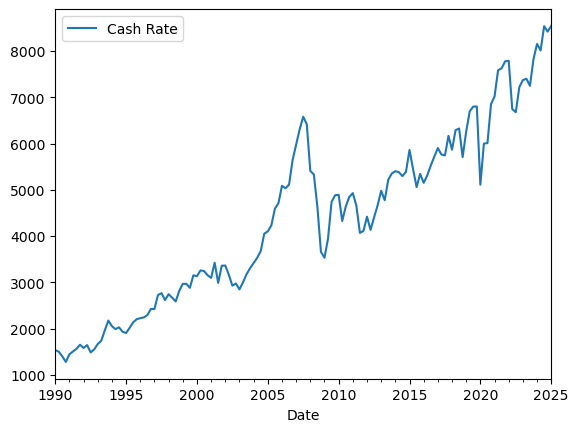

In [6]:
# 绘制现金利率数据的折线图
interest_rates.plot()

In [9]:
# 从 yfinance 获取澳大利亚 CPI 数据 (使用 ^AXJO 作为替代指标)
inflation = yf.download("^AXJO", start="1990-01-01")['Close']
inflation = inflation.resample('Q').last()  # 转换为季度数据
inflation.name = "Inflation"

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_13842/3640563012.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  inflation = inflation.resample('Q').last()  # 转换为季度数据


<Axes: xlabel='Date'>

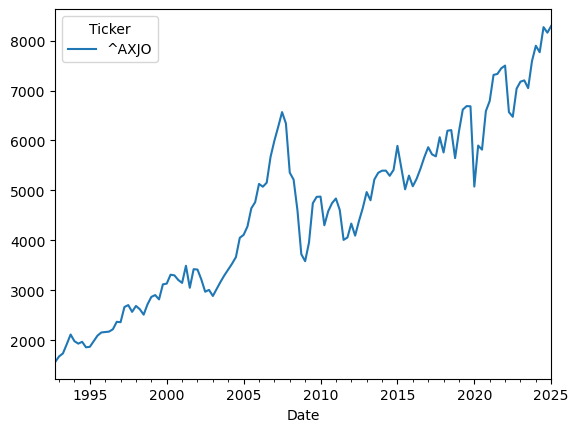

In [10]:
# 绘制通货膨胀率数据的图表
inflation.plot()

In [11]:
# 将通货膨胀数据和利率数据按索引合并,并删除所有包含缺失值的行
combined = inflation.join(interest_rates).dropna()  # Join by index, drop missing data

<Axes: xlabel='Date'>

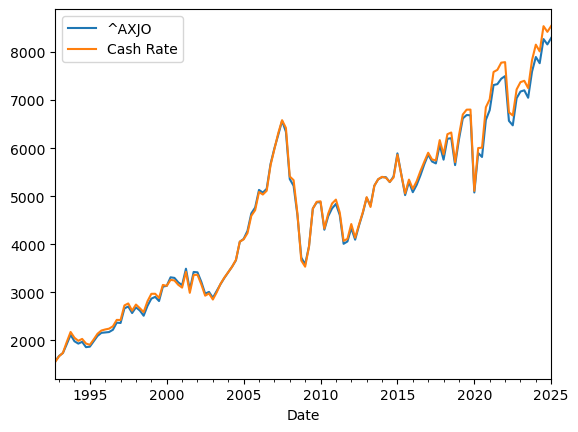

In [12]:
# 绘制通货膨胀率和现金利率的组合数据图表
combined.plot()

Before we comput the correlation, we need to normalise. To do this, we will change the values from absolute values to the difference from the previous record:

在计算相关性之前，我们需要进行归一化处理。为此，我们将把绝对值转换为与前一条记录的差值：


In [13]:
# 计算每个时间点相对于前一个时间点的百分比变化
combined = combined.pct_change()

<Axes: xlabel='Date'>

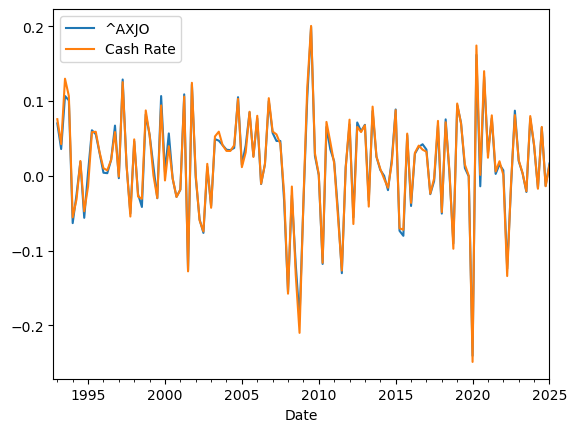

In [14]:
# 绘制合并后的通货膨胀率和现金利率数据图表
combined.plot()

Directly, the correlation is not that strong:

直接来看，相关性并不那么强：


In [4]:
# 计算现金利率和通货膨胀率之间的相关系数
# combined.corr().loc[('Cash Rate', "Inflation")]

# print(combined.columns.tolist())  # 查看 combined 的列名

# 1. 重新加载和处理数据
import yfinance as yf
import pandas as pd

# 获取利率数据
interest_rates = yf.download("^AORD", start="1990-01-01")['Close']
interest_rates = interest_rates.resample('QE').last()  # 使用 'QE' 替代已弃用的 'Q'

# 获取通货膨胀数据
inflation = yf.download("^AXJO", start="1990-01-01")['Close']
inflation = inflation.resample('QE').last()  # 使用 'QE' 替代已弃用的 'Q'

# 2. 直接使用 join 合并数据，这样会自动处理索引
combined = pd.DataFrame()
combined['Inflation'] = inflation
combined['Cash Rate'] = interest_rates
combined = combined.dropna()

# 3. 计算百分比变化
combined = combined.pct_change()

# 4. 添加滞后通胀列
combined['Lagged Inflation'] = combined['Inflation'].shift(2)

# 5. 验证数据
print("\n列名列表:", combined.columns.tolist())
print("\n数据预览:")
print(combined.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



列名列表: ['Inflation', 'Cash Rate', 'Lagged Inflation']

数据预览:
            Inflation  Cash Rate  Lagged Inflation
Date                                              
1992-12-31        NaN        NaN               NaN
1993-03-31   0.070173   0.075811               NaN
1993-06-30   0.035891   0.042401               NaN
1993-09-30   0.106768   0.129912          0.070173
1993-12-31   0.100948   0.106777          0.035891


However, if we add a "lagged inflation" value, we get a stronger correlation:

然而，如果我们添加一个“滞后通胀”值，我们会得到更强的相关性：


In [6]:
# 创建一个新列 'Lagged Inflation'，其值为 'Inflation' 列向后移动2个时期的数据
combined['Lagged Inflation'] = combined['Inflation'].shift(2)

In [7]:
# 显示合并后数据集的前几行数据

combined.head()

,Inflation,Cash Rate,Lagged Inflation
Date,,,
1992-12-31,NaN,NaN,NaN
1993-03-31,0.070173,0.075811,NaN
1993-06-30,0.035891,0.042401,NaN
1993-09-30,0.106768,0.129912,0.070173
1993-12-31,0.100948,0.106777,0.035891


In [8]:
# 计算现金利率和通货膨胀率之间的相关系数
combined.corr().loc[('Cash Rate', "Inflation")]

0.9959178172003053

In [9]:
# 计算现金利率和滞后通胀率之间的相关系数 # 负相关意味着当一个变量增加时，另一个变量倾向于减少
combined.corr().loc[('Cash Rate', "Lagged Inflation")]  # Question - what does negative correlation mean?

-0.0056894461371996595

<Axes: xlabel='Date'>

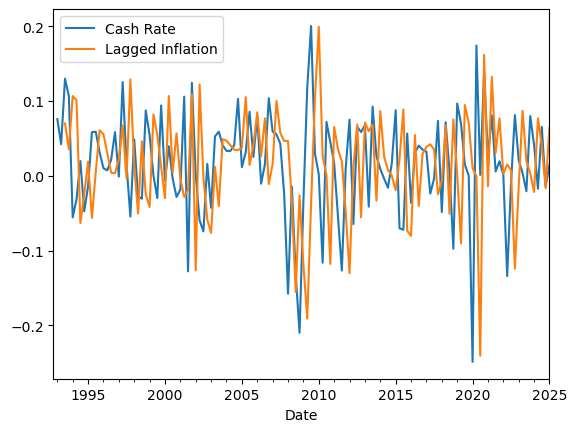

In [10]:
# 绘制现金利率和滞后通胀率的对比图
combined[['Cash Rate', 'Lagged Inflation']].plot()

Not only has the scale of the correlation increased, the sign has swapped! Note, if you choose different lag periods, you will get quite different answers. Further, the economy is much more complex than a single causal relationship - there will be other factors that alter impact of the Cash rate on the inflation, so it is not a single one-to-one relationship.

不仅相关性的规模增加了，符号也发生了变化！请注意，如果选择不同的滞后周期，你会得到非常不同的答案。此外，经济比单一的因果关系要复杂得多——还会有其他因素改变现金利率对通胀的影响，因此这不是一个简单的一对一关系。


#### Exercise

#### 练习

Compute the following graph, which has the lag value as the x-axis, and the correlation as the y-axis.

计算以下图表，其中滞后值作为x轴，相关性作为y轴。

<img src='img/lagged_correlation_plot.png'>

Note also that there is a spike in the -1 to -3 lag period - what does this mean?

还需要注意的是，在滞后期为 -1 到 -3 时出现了一个峰值——这意味着什么？

Note that when you pull down your data, your time period will differ to the one used to create this image. Therefore, your results will vary, slightly, from mine. If you are unsure of your solution, rerun the provided solution for an "up to date" plot.

请注意，当你拉取数据时，你的时间段将与创建此图像时使用的不同。因此，你的结果会与我的略有不同。如果你不确定你的解决方案，请重新运行提供的解决方案以获取“最新”的图表。


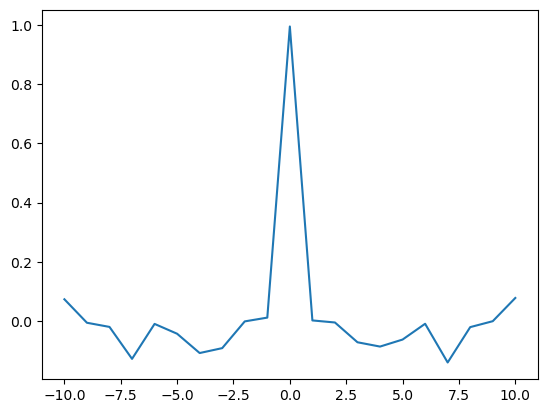

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个从-10到10的等间距数组,共21个点,用于表示不同的时间滞后值
lags = np.linspace(-10,10,21)
# 初始化一个空列表来存储不同滞后值下的相关系数
lagged_corrs = []

# 遍历每个滞后值
for lag in lags:
    # 计算现金利率与通货膨胀率在不同滞后期下的相关系数
    # shift()函数用于移动数据,正值表示向下移动(未来),负值表示向上移动(过去)
    corrr =  combined[["Cash Rate"]].corrwith(combined['Inflation'].shift(int(lag)))
    # 将计算得到的相关系数添加到列表中
    lagged_corrs.append(corrr)

# 绘制滞后相关图,x轴为滞后值,y轴为相关系数
plt.plot(lags.tolist(), lagged_corrs, "-")

*For solutions, see `solutions/lagged_correlations.py`*

*有关解决方案，请参见 `solutions/lagged_correlations.py`*


### Computing Cross Correlation

### 计算互相关


In [15]:
# 导入 statsmodels 的时间序列统计工具模块作为 ts
import statsmodels.tsa.stattools as ts

In [16]:
# 将数据中的正负无穷值替换为 NaN (空值)
combined.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
# 删除包含缺失值(NaN)的行，直接在原数据框上进行修改
combined.dropna(inplace=True)

In [18]:
# 显示合并后数据集的前几行数据

combined.head()

,Inflation,Cash Rate,Lagged Inflation
Date,,,
1993-09-30,0.106768,0.129912,0.070173
1993-12-31,0.100948,0.106777,0.035891
1994-03-31,-0.063162,-0.055438,0.106768
1994-06-30,-0.024746,-0.031172,0.100948
1994-09-30,0.018953,0.019908,-0.063162


In [19]:
# 计算现金利率和通货膨胀率之间的互相关函数(CCF)
ccf = ts.ccf(combined['Cash Rate'], combined['Inflation'])

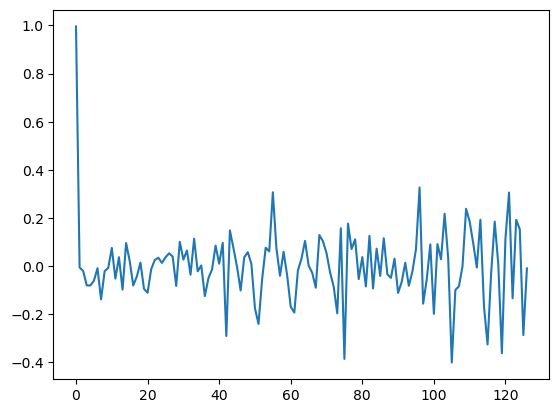

In [20]:
# 绘制现金利率和通货膨胀率之间的交叉相关函数(CCF)图
plt.plot(ccf)

A good rule of thumb is that a correlation is significant if it is higher than $\frac{2}{\sqrt{n - |k|}}$, where $n$ is the number of datapoints, and $|k|$ is the lag:

一个好的经验法则是，如果相关性高于 $\frac{2}{\sqrt{n - |k|}}$，则认为相关性显著，其中 $n$ 是数据点的数量，$|k|$ 是滞后量：


(-1.0, 1.0)

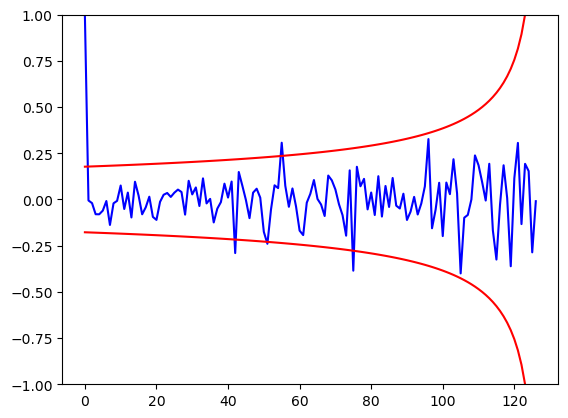

In [21]:
# 获取数据长度
n = len(combined)
# 创建从0到n的数组
x = np.arange(0, n)
# 计算正向置信区间阈值
threshold_positive = 2 / np.sqrt(n - x)
# 计算负向置信区间阈值
threshold_negative = 2 / -np.sqrt(n - x)

# 绘制交叉相关函数(CCF)曲线，使用蓝色
plt.plot(ccf, 'b')
# 绘制正向置信区间阈值线，使用红色
plt.plot(threshold_positive, 'r')
# 绘制负向置信区间阈值线，使用红色
plt.plot(threshold_negative, 'r')
# 设置y轴范围为-1到1
plt.ylim(-1, 1)

We can see "significant" peaks at 20, 36 and 40. I put significant in quotes here - this is just a rule of thumb, and should be tested more robustly. Further, we haven't checked our assumptions about the data that are necessary for such a test.

我们可以看到在20、36和40处有“显著”的峰值。我在这里用引号标注“显著”——这只是一个经验法则，应该进行更严格的测试。此外，我们还没有检查进行此类测试所需的数据假设。


In [22]:
# 找出相关系数大于正阈值的位置索引
np.where(ccf > threshold_positive)[0]  # np.where tells us the index where a test is true.

array([ 0, 55])

In [23]:
# 找出交叉相关函数值小于负阈值的索引位置
np.where(ccf < threshold_negative)[0]

array([42, 51, 75])

### Requirements and assumptions

### 要求和假设

Cross correlation tests have important assumptions that must be adhered to.

交叉相关性检验有一些必须遵守的重要假设。

* No autocorrelation
* Time series are stationary

We will examine both of these concepts, and how to test for them.

我们将研究这两个概念，以及如何对它们进行测试。


### Autocorrelation

### 自相关

Autocorrelation is the rate at which a series of data (usually time series) correlates with itself (specifically, itself with lag). An example of this is a time series where one value is dependent on the previous version:

自相关是指一系列数据（通常是时间序列）与其自身（特别是带有滞后的自身）相关的速率。一个例子是时间序列中的一个值依赖于其前一个值的情况：


In [24]:
# 这是一个完全随机的序列，它不应该依赖于自身，因此不应该有任何自相关性
random_values = [0]

for i in range(100):
    # 仅添加一个随机值（在-0.5到0.5之间）
    random_values.append(np.random.random() - 0.5)

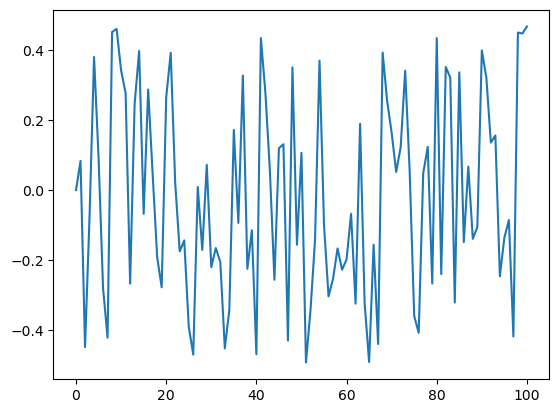

In [25]:
# 绘制随机值序列的折线图

plt.plot(random_values)

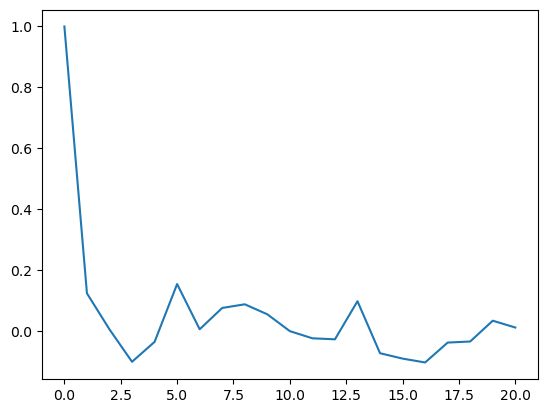

In [26]:
# 计算自相关值，即序列与其自身滞后值的相关性
plt.plot(ts.acf(random_values))

In the above graph, we see the values correlate exactly with itself with no lag - unsurprising!

在上面的图表中，我们看到这些值与自身完全相关，没有滞后——这并不令人惊讶！

However, after this, any other lag value has a near-zero correlation, indicating no correlation between the values and the lagged version.

然而，在此之后，任何其他滞后值都具有接近零的相关性，表明值与滞后版本之间没有相关性。

Let's now create a time series with dependency.

现在让我们创建一个具有依赖性的时间序列。


In [27]:
# 这是一个示例，其中当前值(n)依赖于前一个值(n-1)
values = [0]

for i in range(100):
    # 将随机值加到前一个值上。虽然值是随机的，但由于依赖前值，所以是有偏的随机
    values.append(np.random.random() - 0.5 + values[-1])

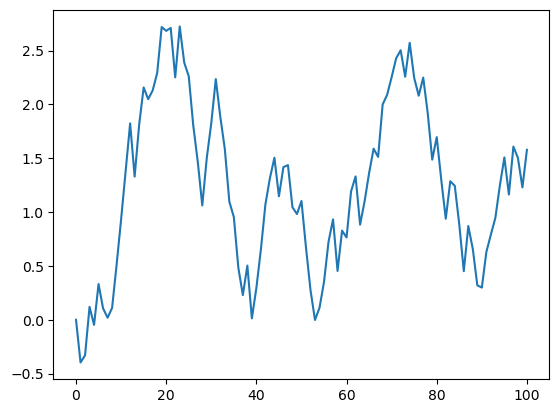

In [28]:
# 绘制一个图表，显示每个值都依赖于前一个值的时间序列数据

plt.plot(values)

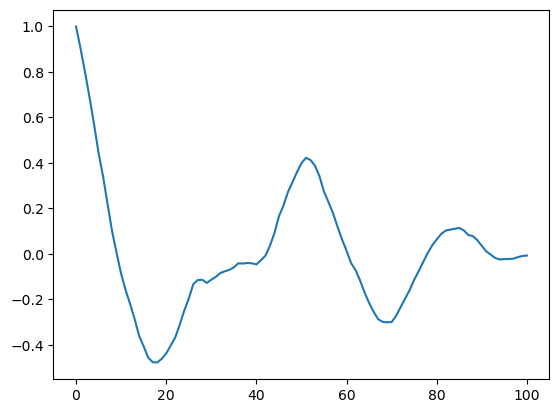

In [29]:
# 绘制时间序列的自相关函数(ACF)图，最大滞后期为100。自相关函数显示了时间序列与其自身在不同时间滞后下的相关性
plt.plot(ts.acf(values, nlags=100))

In this example, the values are correlated with itself (as per the definition of correlation), but the correlation stays high as the lag increases. This shows that the values are dependent on themselves.

在这个例子中，数值与其自身相关（根据相关性的定义），但随着滞后的增加，相关性仍然保持较高水平。这表明数值依赖于其自身。

If your data is autocorrelated, you should remove this before computing cross correlation with other time series. You can remove autocorrelation with a process known as pre-whitening, which removes the autocorrelation.

如果你的数据是自相关的，你应该在计算与其他时间序列的互相关之前去除这种自相关性。你可以通过一种称为预白化的过程来去除自相关性，该过程会消除自相关。

An example of a method for this is Holt Winters. Techniques like this are also known as smoothing algorithms, but that term has multiple meanings, and smoothing algorithms have multiple uses.

一个例子是霍尔特-温特斯方法。这类技术也被称为平滑算法，但这个术语有多种含义，且平滑算法有多种用途。


In [30]:
# 导入 Holt-Winters 简单指数平滑模型
# statsmodels.tsa.holtwinters 模块提供了时间序列平滑和预测的功能
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [31]:
# 创建一个简单指数平滑模型对象，用于对时间序列数据 values 进行平滑处理
model = SimpleExpSmoothing(values)

In [32]:
# 拟合指数平滑模型,返回拟合结果
model_fit = model.fit()

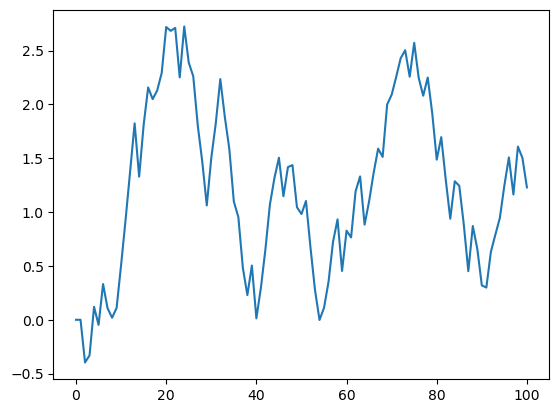

In [33]:
# 绘制指数平滑模型的拟合值曲线
plt.plot(model_fit.fittedvalues)

#### Exercises

#### 练习

1. Review the documentation on the Smoothing algorithms from https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html See also the "Next" link to the left to view more algorithms.

1. 查看关于平滑算法的文档，网址为 https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html。还可以点击左侧的“Next”链接查看更多算法。
2. Check the autocorrelation for two currencies from Quandl (try the BUNDESBANK data source)

2. 检查来自Quandl的两种货币的自相关性（尝试使用BUNDESBANK数据源）
3. Using a smoothing (whitening) algorithm, smooth the values of those currencies and check for autocorrelations in the results

3. 使用平滑（白化）算法对这些货币的值进行平滑处理，并检查结果中的自相关性


In [34]:
#ExponentialSmoothing?

# 从 Bundesbank 获取欧元兑澳元的汇率数据
euro = quandl.get("BUNDESBANK/BBEX3_M_AUD_EUR_CM_AC_A01")  # Euros in AUD

# 提取汇率值并命名为 EURO
euros = euro['Value']
euros.name = "EURO"
euros.head()

# 从 Bundesbank 获取美元兑澳元的汇率数据
usd = quandl.get("BUNDESBANK/BBEX3_M_AUD_USD_CM_AC_A01")['Value']
usd.name = "USD"
usd.head()

#ExponentialSmoothing?

# 对欧元汇率数据进行指数平滑处理
euro_model = SimpleExpSmoothing(euros)
euro_fit = euro_model.fit()
# 绘制欧元汇率指数平滑后的自相关函数图
plt.plot(ts.acf(euro_fit.fittedvalues, nlags=100))

# 对美元汇率数据进行指数平滑处理
usd_model = SimpleExpSmoothing(usd)
usd_fit = usd_model.fit()
# 绘制美元汇率指数平滑后的自相关函数图
plt.plot(ts.acf(usd_fit.fittedvalues, nlags=100))

NameError: name 'quandl' is not defined

*For solutions, see `solutions/exponential_smoothing.py`*

*有关解决方案，请参见 `solutions/exponential_smoothing.py`*


### Stationarity

### 平稳性

A stationary dataset is one where the main statistics are consistent throughout the given data, usually the mean and standard deviation. For instance, a time series with inflation would not be stationary, as it tends to grow overtime:

平稳数据集是指主要统计量在整个给定数据中保持一致的数据集，通常是均值和标准差。例如，带有通货膨胀的时间序列不会是平稳的，因为它往往会随着时间的推移而增长：


In [65]:
# 导入 Quandl 库，用于获取金融和经济数据

import quandl

In [66]:
# 从 LPPM/PLAT 数据集获取铂金的上午美元价格数据
platinum_prices = quandl.get("LPPM/PLAT")['USD AM']

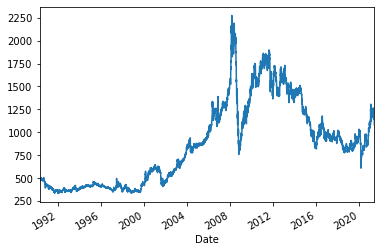

In [67]:
# 绘制铂金价格的时间序列图
platinum_prices.plot()

If we plot the moving average, we can see it tends to increase:

如果我们绘制移动平均线，可以看到它趋于增加：


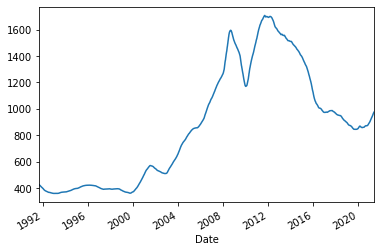

In [68]:
# 计算铂金价格的365天移动平均线并绘制图表
platinum_prices.rolling(365).mean().dropna().plot()  # Rolling n day window

We can see here that the mean is not consistent over time. This data is not stationary, which we can test more formally:

我们可以看到，均值随时间不一致。这些数据不是平稳的，我们可以更正式地测试这一点：


In [69]:
# 从statsmodels.tsa.stattools导入ADF单位根检验函数
from statsmodels.tsa.stattools import adfuller

# 对铂金价格序列进行ADF检验
result = adfuller(platinum_prices)

# 打印ADF检验统计量，用于判断序列是否平稳
print('ADF Statistic: {:.2f}'.format(result[0]))

# 打印p值，如果p值小于显著性水平(通常0.05)，则可以拒绝"序列存在单位根"的原假设
print('p-value: {:.2f}'.format(result[1]))

ADF Statistic: -1.67
p-value: 0.45


If the p-value is less than a given threshold (for instance 0.05) we would reject the hypothesis of a "unit root" and declare the dataset as stationary. Let's do the same test with our random values from before

如果 p 值小于给定的阈值（例如 0.05），我们将拒绝“单位根”假设，并声明数据集是平稳的。让我们用之前的随机值进行相同的测试。


In [70]:
# 对随机值序列进行 Augmented Dickey-Fuller 单位根检验
result = adfuller(random_values)
# 打印 ADF 检验统计量，保留两位小数
print('ADF Statistic: {:.2f}'.format(result[0]))
# 打印对应的 p 值，保留两位小数
print('p-value: {:.2f}'.format(result[1]))

ADF Statistic: -10.18
p-value: 0.00


We can see here a p-value of (near) zero, which we would expect in this data as it has no time dependent structure.

我们可以看到这里的p值接近零，这是我们所期望的，因为这些数据没有时间依赖性结构。


#### Exercises

#### 练习

1. Compute the `adfuller` statistic for the currencies you extracted from Quandl earlier.

1. 计算你之前从 Quandl 提取的货币的 `adfuller` 统计量。
2. A simple method of transforming data to be stationary is to compute the difference to the previous value. Difference your data to obtain a stationary dataset.

2. 将数据转换为平稳数据的一种简单方法是计算与前一个值的差值。对数据进行差分以获得平稳数据集。
3. Another method to create stationary data is transform the data using a log function. Compute the log of the currencies and recompute the adfuller statistic.

3. 另一种创建平稳数据的方法是使用对数函数对数据进行转换。计算货币的对数并重新计算 adfuller 统计量。


*For solutions, see `solutions/adfuller.py`*

*有关解决方案，请参见 `solutions/adfuller.py`*


### CAPM - Capital Asset Pricing Model

### CAPM - 资本资产定价模型

The CAPM model is a widely used model to determine expected returns for an asset and the impact of systematic risk. One method for calculating systematic risk is to measure the correlation between a stock and the market in general.

CAPM模型是一种广泛使用的模型，用于确定资产的预期收益和系统性风险的影响。计算系统性风险的一种方法是衡量股票与整个市场之间的相关性。

The CAPM model is:

CAPM 模型是：


$ \bar{R_a} = R_f + \beta (\bar{R_m} - R_f)$

Where:

* $\bar{R_a}$ is the expected return of the investment
* $R_f$ is the risk free rate
* $\beta$ is the Beta of the investment (see below)
* $\bar{R_m}$ is the expected return of the market

Note that the value $(\bar{R_m} - R_f)$ is also known as the market risk premium.

请注意，$(\bar{R_m} - R_f)$ 的值也被称为市场风险溢价。

The Beta of an investment is the volatility of the stock, in relation to the market. If the stock moves with the market, it has a Beta around 1.0 (the market itself has, by definition, a Beta of 1.0). Stocks with low Beta values have less risk. High Beta values have high risk.

投资的贝塔值是股票相对于市场的波动性。如果股票与市场同步波动，其贝塔值约为1.0（市场本身的贝塔值定义为1.0）。贝塔值较低的股票风险较小，而贝塔值较高的股票风险较大。

To compute Beta, the equation is:

计算 Beta 的公式是：

$\beta = \frac{cov(a, m)}{var(m)}$

Where $var(m)$ is the variance of the market, and $cov(a, m)$ is the covariance between the market and the given asset.

其中 $var(m)$ 是市场的方差，$cov(a, m)$ 是市场与给定资产之间的协方差。

#### Extended Exercise

#### 扩展练习

1. Download the S&P 500 data from Quandl. Use the dataset search to find an appropriate data source.

1. 从 Quandl 下载标普 500 数据。使用数据集搜索找到合适的数据源。
2. Compute the percentage change on a daily basis as a value between 0 and 100% - not a decimal. You'll need the closing price.

2. 计算每日的百分比变化，值在0到100%之间，而不是小数。你需要使用收盘价。
3. Repeat steps 1 and 2 for a given stock (the provided solution uses Coca Cola)

3. 对给定股票重复步骤1和2（提供的解决方案使用可口可乐）
4. Compute the Beta value, using the prices for the period 2016 to 2018 inclusive

4. 使用2016年至2018年期间的价格计算Beta值
5. Compute the CAPM value, with a risk free rate of 2.5% (or another if you have a preferred risk free investment). Hint: CAGR

5. 计算 CAPM 值，假设无风险利率为 2.5%（或者如果你有偏好的无风险投资，可以使用其他值）。提示：CAGR


In [71]:
# 获取标普500指数数据
sp500 = quandl.get("CHRIS/CME_SP1")

# 获取2016-2018年的样本数据并删除缺失值
sp500_sample = sp500.loc["2016":"2018"].dropna()

# 计算市场收益率(百分比)
market = sp500_sample['Last'].pct_change().dropna() * 100

# 获取可口可乐股票数据
cola = quandl.get("WIKI/KO")

# 获取可口可乐2016-2018年的样本数据
cola_sample = cola['2016':"2018"]

# 计算可口可乐股票收益率(百分比)
coca = cola_sample['Close'].pct_change().dropna() * 100

# 计算市场方差
market_variance = market["2016":"2018"].var()
print(f"Market Variance: {market_variance}")

# 计算股票与市场的相关系数
stock_cov = market.corr(coca)

print(f"Stock Covariance: {stock_cov}")

# 计算贝塔系数
beta = stock_cov / market_variance

print(f"Beta: {beta}")

# 计算市场回报率
e = ending_balance = sp500_sample.iloc[-1]["Last"]  # 期末价格
s = starting_balance = sp500_sample.iloc[0]["Last"]  # 期初价格
n = number_years = 3  # 2016, 2017, 2018
return_on_market = (e / s) ** (1 / n) - 1  # 计算年化市场回报率

print(f"Return on Market: {return_on_market}")

# 使用资本资产定价模型(CAPM)计算预期收益率
capm = .025  + beta * (return_on_market - .025)  # 无风险利率为2.5%
print(f"CAPM: {capm}")

Market Variance: 0.7265414157716941
Stock Covariance: 0.4684920443273424
Beta: 0.6448249668323929
Return on Market: 0.0772352134654195
CAPM: 0.058682569790322096


*For solutions, see `solutions/capm.py`*

*有关解决方案，请参见 `solutions/capm.py`*
